## Self organizing map(SOM)
SOM is a type of Artificial Neural Network(ANN) used for producing a low dimentional(usually 2D) representation of a high dimentional dataset. It is also called Kohonen map or Kohonen network. It consists of nodes or neurons organized in a grid-like structure having an associated weight and having the dimensionality same as the dimentionality of the input data. SOM learns to map high dimentional data into a drid while reserving the topological relationships between data points. 
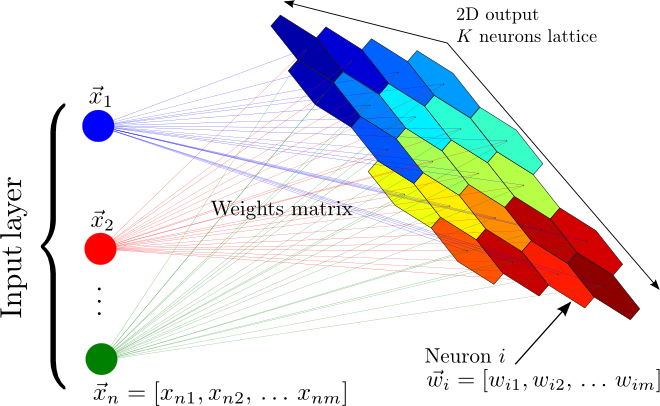

Why is SOM useful? 

SOM is generally used for dimensionality reduction, which has the following benefits.
- **Visualization**: Our brain cannot interpret higher dimensions very well. So, reducing the dimensions helps us to better visualize and interpret the data.
- **Nose Reduction**: While reducing the dimensions, only the most meaningful information is preserved. Which means, often, the noise goes away while reducing the dimensions.
- **Memory and Computational efficiency**: Lowering the dimensions of data reduces the amount of memory and resources required to process the data.

### Algorithm
1. **Initialization**: First we select the size of the map and initialize each node with random weights. 
2. **Selection of input vector**: Input vector is a reference node in the map using which we will update the nodes. This input vector is randomly picked. Let's call this input vector $D(t)$
3. **Finding the BMU**: *BMU(Best Matching Unit)* is the node which has the smallest distance(usually Eucledian distance) from the input weight vector. To find this node, we traverse through each node in the map and select the none with the minimum Eucledian Distance.
4. **Updating the Weights**: The BMU and it's neighbors within the *neighborhood distance* are updated in the following way.
 $W_v (s+1) = W_v (s) + \theta(u,v,s).\alpha(s).(D(t) - W_v(s))$
 Here, 
 - $W_v$ : Current weight vector of the node $v$
 - $s$ : Current iteration
 - $\theta(u,v,s)$: Neighborhood function which provides the restraint to distance from the BMU. In our project we have chosen the most commonly used *Gaussian Function* given by: $e^{(-distance^2 /2\sigma^2)}$, $\sigma$ is the spread of Gaussian function. Higher sigma means higher spread.
 - $\alpha(s)$ :Current learning rate
 - $D(t) - W_v(s)$: Distance between input vector and current vector
 5. **Repitition**: We repeat steps 2-4 as long as $s < $ number of epochs


### SOM in Iris dataset
In this project, we have implemented SOM in iris dataset, which is initially 4-dimensional. We will try to reduce it to 2-dimensions while preserving their classes. The classes in this dataset are the three species: setosa, versicolor and virginica.

**Prepared by:**
- Avinash Aryal(076BEI009)
- Diwas Adhikari(076BEI014)
- Kshitiz Pandey(076BEI019)

In [ ]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
# load the iris dataset
iris = load_iris()
data = iris.data
data.shape

In [ ]:
#let's look at the first 5 data
# it has 4 dimentions
#sepal_length sepal_width petal_length petal_width
data[:5]

In [ ]:
# let's try to visualize this 4D data
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])
sns.pairplot(iris_df, hue='target')
plt.show()

In [ ]:
#normalizing  the data for better resutls
#x_scaled = (x - x_min)/(x_max - x_min)
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized[:5]

In [ ]:
# Define the Self-Organizing Map class
class SelfOrganizingMap:
    #initialization
    def __init__(self, input_size, map_size, learning_rate=0.2, sigma=1.0, num_epochs=100):
        self.input_size = input_size
        self.map_size = map_size
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.num_epochs = num_epochs
        self.weights = np.random.rand(map_size[0], map_size[1], input_size)
    
    #calculating the node with minimum distance and returning the index
    def find_bmu(self, input_data):
        distances = np.linalg.norm(self.weights - input_data, axis=2)
        bmu = np.unravel_index(np.argmin(distances), distances.shape)
        return bmu

    #updating the weights of neighboring nodes of bmu with update rule
    def update_weights(self, bmu, input_data, iteration):
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                distance = np.linalg.norm(np.array([i, j]) - bmu)
                #using Gaussian function as neighborhood function to calculate the influence
                influence = np.exp(-distance**2 / (2 * (self.sigma**2)))
                self.weights[i, j] += self.learning_rate * influence * (input_data - self.weights[i, j])
    
    #repeat the process of finding bmu and updating weights to train
    def train(self, data):
        for epoch in range(self.num_epochs):
            print(f"Epoch {epoch+1}/{self.num_epochs}")
            for input_data in data:
                bmu = self.find_bmu(input_data)
                self.update_weights(bmu, input_data, epoch)


In [ ]:
#Train the model
input_size = data_normalized.shape[1]
map_size = (8,8)
som = SelfOrganizingMap(input_size, map_size)
som.train(data_normalized)

In [ ]:
#map the data points to the closest som neuron
mapped_data = np.array([som.find_bmu(input_data) for input_data in data_normalized])

#plot the nodes with different colors for different classes
plt.figure(figsize=(10, 8))
plt.scatter(mapped_data[:,0], mapped_data[:,1], c=iris.target)
plt.title("2D Representation of Iris Dataset using SOM")
plt.xticks(range(map_size[1]))
plt.yticks(range(map_size[0]))
plt.colorbar(label='Iris Class')
plt.show()


In [ ]:
#now let's do the same thing using MiniSom library
from minisom import MiniSom


# Define the Self-Organizing Map and train it
map_size = (8, 8)
mini_som = MiniSom(map_size[0], map_size[1], data_normalized.shape[1], sigma=1.0, learning_rate=0.5)
mini_som.random_weights_init(data_normalized)
num_epochs = 1000
mini_som.train_random(data_normalized, num_epochs)

# Create a map of the 2D representation
mapped_data = np.array([mini_som.winner(x) for x in data_normalized])

# Plot the 2D representation of the Iris dataset
plt.figure(figsize=(10, 8))
plt.scatter(mapped_data[:, 0], mapped_data[:, 1], c=iris.target)
plt.title("2D Representation of Iris Dataset using SOM")
plt.colorbar()
plt.show()


### Conclusion
We can see in both of these plots that the same class data is clustered together. It means that we have preserved the relevant information while reducing the dimension from 4D to 2D. The initial 4-Dimentional data couldn't be visualized well. We had to look at 16 different pair plots. Even then, we couldn't make meaningful interpretation. But, after applying SOM and converting it to 2-dimentional data, we can just plot it in a 2D grid and visualize it, which is very intuitive. Hence, SOM can be used for dimensionality reduction and clustering purposes.